In [1]:
# Setting up dependencies to be utilized later here.
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics
import numpy as np
import calendar
from linearreggression import linreg

In [2]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path = Path("Resources/lottery_data.csv")
wa_lottery_df = pd.read_csv(wa_lottery_path)

# displaying .csv just to see what data we have
wa_lottery_df

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,5/7/2014,Wed,17-29-31-48-49,34,2,7.000000e+07
1,5/10/2014,Sat,4-31-41-47-55,1,2,9.000000e+07
2,5/14/2014,Wed,7-33-39-52-55,33,3,9.000000e+07
3,5/17/2014,Sat,23-32-39-47-49,22,3,1.140000e+08
4,5/21/2014,Wed,4-20-34-39-58,31,5,1.140000e+08
...,...,...,...,...,...,...
945,10/24/2022,Mon,18-23-35-45-54,16,4,6.250000e+08
946,10/26/2022,Wed,19-36-37-46-56,24,2,7.000000e+08
947,10/29/2022,Sat,19-31-40-46-57,23,3,8.250000e+08
948,10/31/2022,Mon,13-19-36-39-59,13,3,1.000000e+09


In [3]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball = wa_lottery_df[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped = weekday_powerball.groupby('weekday')['powerball'].apply(lambda x: x.mode())

In [4]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay = wa_lottery_df[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped = weekday_powerplay.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

In [5]:
# Combine powerplay/powerball common
combined_common_weekday = pd.merge(powerball_grouped, powerplay_grouped, on ='weekday')

# Display the data types of the columns in the DataFrame


# Question 1 Answer
combined_common_weekday

,powerball,powerplay
weekday,,
Mon,16,2
Mon,22,2
Sat,18,2
Wed,24,2


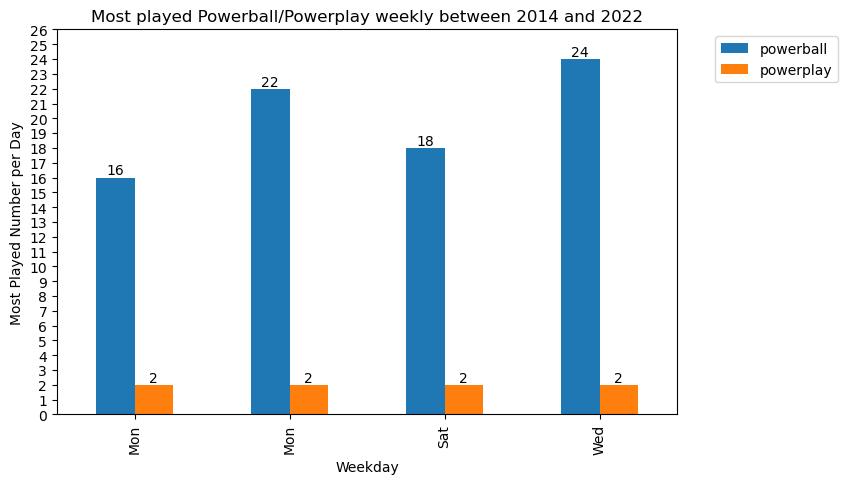

In [6]:
# Create a bar chart based off of the group series from before
ax = combined_common_weekday.plot(kind='bar', figsize=(8,5))

# set the y-axis so it looks better
ax.set_ylim(0, 19)
ax.set_yticks(range(0, 27, 1))

# Label the axis and title the graph
ax.set_xlabel("Weekday")
ax.set_ylabel("Most Played Number per Day")
ax.set_title('Most played Powerball/Powerplay weekly between 2014 and 2022')
ax.legend(title = 'Lottery', loc = 'upper right')
for container in ax.containers:
    ax.bar_label(container)
    
# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')


plt.show()

In [7]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball = wa_lottery_df[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball['date'] = pd.to_datetime(date_powerball['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball['month'] = date_powerball['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball.groupby('month')

# create an empty dictionary
powerball_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1,13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    # Getting rows

    # take the variable month_data the mode and store to list
    powerball_common[i] = month_data['powerball'].mode().to_list()

# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerball_common_series = (pd.Series(powerball_common))

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerball_common = powerball_common_series.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months = cleaned_powerball_common.to_frame(name='Common Powerballs')  

In [8]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay = wa_lottery_df[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay['date'] = pd.to_datetime(date_powerplay['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay['month'] = date_powerplay['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball
month = date_powerplay.groupby('month')

# create an empty dictionary
powerplay_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common[i] = month_data['powerplay'].mode().to_list()
    
# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerplay_common_series = pd.Series(powerplay_common)

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerplay_common = powerplay_common_series.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months = cleaned_powerplay_common.to_frame(name='Common Powerplays')  


In [9]:
# combine the two dataframes that hold the months together
combined_common_months = pd.merge(powerplay_common_months, powerball_common_months, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_name)))

# rename function for index change
combined_common_months = combined_common_months.rename(index=month)



# Question 2 Answer

combined_common_months

,Common Powerplays,Common Powerballs
January,[2],[22]
February,[2],[19]
March,[2],[6]
April,[2],[18]
May,[2],[9]
June,[2],"[7, 25]"
July,[2],[26]
August,[2],[24]
September,[2],"[21, 25]"
October,[2],[23]


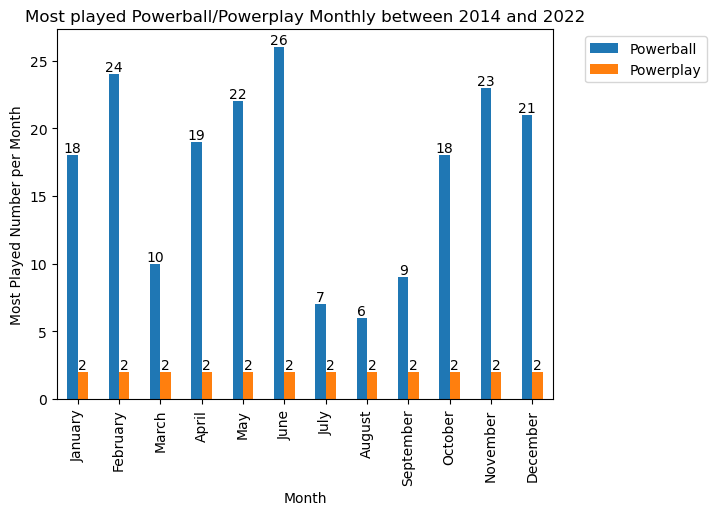

In [10]:
# question 2 Graphed

# Explode my combined_common_months so that I can put it back into a dataframe that is more malleable for graphing
powerplay_nums = combined_common_months['Common Powerplays'].explode()
powerball_nums = combined_common_months['Common Powerballs'].explode()


# Create a new DataFrame with the exploded data
powerplay_nums = pd.DataFrame({'Month': powerplay_nums.index, 'Type': 'Powerplay', 'Value': powerplay_nums.values})
powerball_nums = pd.DataFrame({'Month': powerball_nums.index, 'Type': 'Powerball', 'Value': powerball_nums.values})

powerplay_powerball_nums = pd.concat([powerplay_nums, powerball_nums], axis = 0)


# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html, https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot
# https://builtin.com/data-science/pandas-pivot-tables
# Index is set to 'Month' in powerplay_powerball_nums_2020
# Columns is set to 'Type' from powerplay_powerball_nums_2020 (powerball, powerplay)
# values is set to 'Value' column which is the powerplay numbers and powerball numbers respectively.
# The aggfunc took longer to figure out, it takes the first non-null value for each index and column values

ax = powerplay_powerball_nums.pivot_table(index='Month', columns='Type', values='Value', aggfunc='first').plot(kind='bar')
plt.ylabel('Most Played Number per Month')
plt.title('Most played Powerball/Powerplay Monthly between 2014 and 2022')
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container)
    
# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months)

plt.show()

In [11]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common = wa_lottery_df.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums = year_tot_common.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())


#Answer to Question 3

print(f"There was only one common PowerBall number for Saturday {year_common_powernums.loc['Sat', 'powerball']}, and Wednesday {year_common_powernums.loc['Wed', 'powerball']}")
print(f"There was only one common PowerBall number for Saturday {year_common_powernums.loc['Sat', 'powerplay']}, and Wednesday {year_common_powernums.loc['Wed', 'powerplay']}")


There was only one common PowerBall number for Saturday 18.0, and Wednesday 24.0
There was only one common PowerBall number for Saturday 2.0, and Wednesday 2.0


In [12]:
# Delimiter break the white numbers for all years, find the frequency as a scatterplot.

wa_lottery = wa_lottery_df[['date', 'winning_numbers']].copy()
wa_lottery_white_numbers = wa_lottery['winning_numbers']

wa_lottery_number = wa_lottery_white_numbers.str.split("-")
wa_lottery_number = wa_lottery_number.explode()

# need the value_counts() for the frequency of lotto numbers to be plotted
wa_lottery_number_frequency = wa_lottery_number.value_counts()

total_white_nums = wa_lottery_number_frequency.sum()

# wa_lottery_number_mode
numbers = wa_lottery_number

# the following statement takes the values in wa_lottery_number, adds them to the dictionary frequency, the key is the
# white number, while the value frequency that number appears.
frequency = {}
for number in numbers:
    if number not in frequency:
        frequency[number] = 1
    else:
        frequency[number] += 1

# https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list, utilizing from collections import Counter
# this will enable me to set a counter to my dictionary of keys, the values that are the top five highest will be 
# printed
from collections import Counter
data = Counter(frequency)
print(data.most_common(5))

# get all the keys from my dictionary frequency
values = frequency.values()
keys = frequency.keys()
percentages = {}

for key, value in frequency.items():
    percent = (value / total_white_nums) * 100
#     print(f"The white number {key} is shown to be {round(percent, 1)}%")
    percentages[key] = round(percent, 1)



[('39', 89), ('32', 88), ('21', 84), ('28', 81), ('36', 80)]


In [13]:
# set up the white numbers to be plotted.
white_numbers_frequency = pd.DataFrame.from_dict(frequency, orient = 'index', columns = ['Frequency'])
white_numbers_frequency.index.name = 'White Numbers'
white_numbers_frequency = white_numbers_frequency.reset_index()

# convert the 'White Numbers' column to a numeric data type
white_numbers_frequency['White Numbers'] = pd.to_numeric(white_numbers_frequency['White Numbers'])

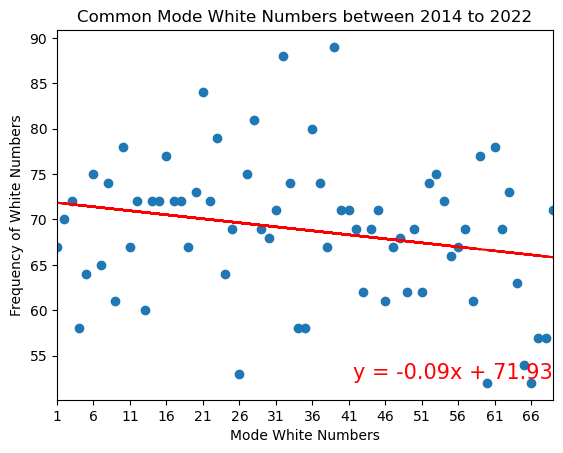

The r-value is: -0.22429273278388057


In [14]:
# linear regression of lottery numbers % with r_val
x_values = white_numbers_frequency['White Numbers']
y_values = white_numbers_frequency['Frequency']

graph_linreg = linreg(x_values, y_values, 'Mode White Numbers','Frequency of White Numbers', 'Common Mode White Numbers between 2014 to 2022')


In [15]:
white_numbers_frequency

,White Numbers,Frequency
0,17,72
1,29,69
2,31,71
3,48,68
4,49,62
...,...,...
64,63,73
65,65,54
66,66,52
67,67,57


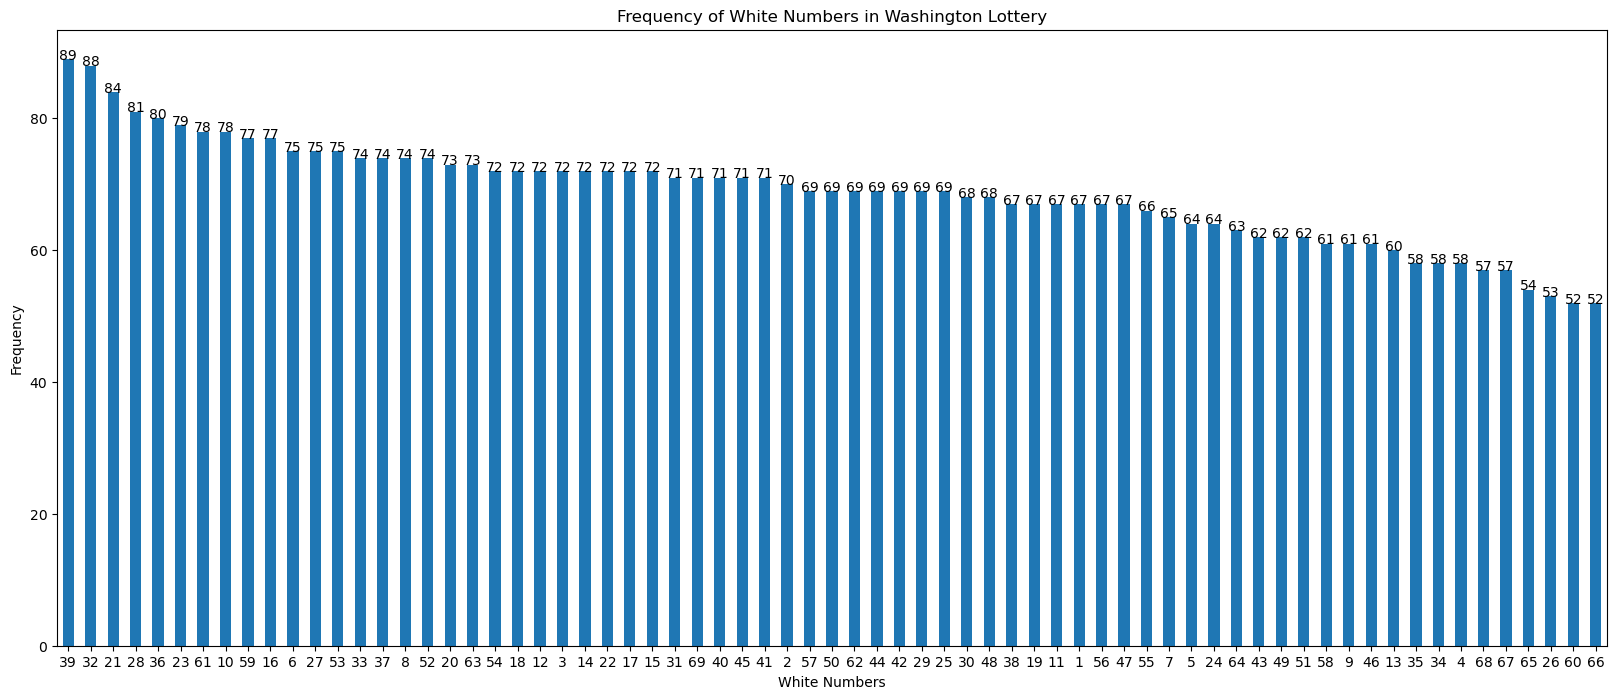

In [31]:
# plot the frequency of whitenumbers for all the years

width = 20
height = 8
plot1 = wa_lottery_number_frequency.plot(kind = 'bar', width=0.5)
plt.rcParams['figure.figsize'] = [width, height]

# Set the title and labels
plt.title('Frequency of White Numbers in Washington Lottery')
plt.xlabel('White Numbers')
plt.ylabel('Frequency')

# Add frequency values on top of each bar
for index, value in enumerate(wa_lottery_number_frequency):
    plt.text(index, value, str(value), ha='center')

# Rotate x-axis labels
plt.xticks(rotation=0)


# Show the plot
plt.show()

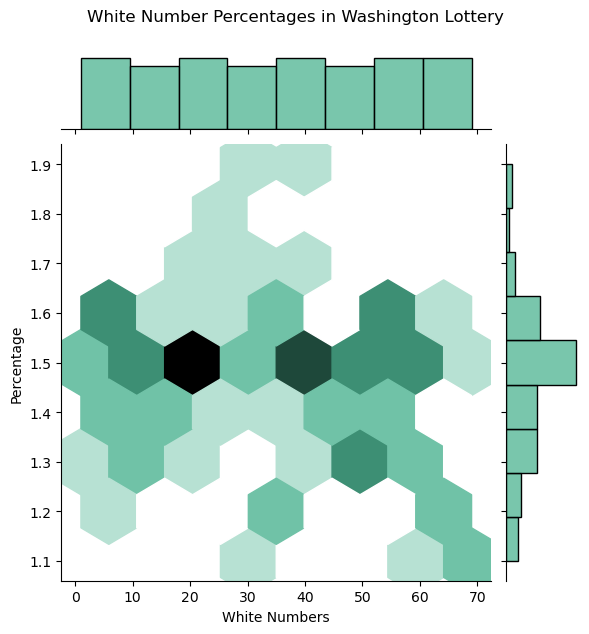

In [17]:
# https://seaborn.pydata.org/examples/hexbin_marginals.html

# Convert the percentages dictionary to a Pandas DataFrame
data = pd.DataFrame(percentages.items(), columns=['White Numbers', 'Percentage'])

# Convert the 'White Numbers' column to a numeric data type
data['White Numbers'] = pd.to_numeric(data['White Numbers'])

# Create a bar plot of the percentages dictionary
# sns.set_theme(style="ticks")
ax = sns.jointplot(data=data, x = 'White Numbers', 
              y = 'Percentage', 
              kind = 'hex', 
              color="#4CB391")
ax.set_axis_labels('White Numbers', 'Percentage')
ax.fig.suptitle('White Number Percentages in Washington Lottery', y = 1.05)

# Show the plot
plt.show()


In [18]:
# make a copy of the original DataFrame to manipulate
month_lottery_df = wa_lottery_df.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df['date'] = pd.to_datetime(month_lottery_df['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df['month'] = month_lottery_df['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball
month = month_lottery_df.groupby('month')

# create an empty dictionary
jackpot_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest
    jackpot_common[i] = month_data['jackpot'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months = pd.DataFrame.from_dict(jackpot_common, orient='index', columns=['Max Month Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months['Months'] = month


# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months.sort_values(by=['Max Month Jackpot'], ascending = False)


# ANSWER QUESTION 4

print(top_months_jackpot.head(5))

    Max Month Jackpot    Months
11       1.200000e+11  November
1        1.500000e+09   January
10       1.000000e+09   October
3        7.500000e+08     March
8        7.000000e+08    August


In [19]:
# Generated a new dataframe that holds only the three columns 'date' + 'weekday' + 'jackpot'
weekday_jackpot = wa_lottery_df[['date', 'weekday', 'jackpot']]

# find the highest jackpot
greatest_jackpot = weekday_jackpot.loc[weekday_jackpot['jackpot'].idxmax()]

#ANSWER QUESTION 5 

print(f"{greatest_jackpot.date} had the greatest jackpot for 2020 with {greatest_jackpot.jackpot} dollars.")

11/2/2022 had the greatest jackpot for 2020 with 120000000000.0 dollars.


In [20]:
jackpot_common_months

,Max Month Jackpot,Months
1,1.500000e+09,January
2,5.000000e+08,February
3,7.500000e+08,March
4,4.540000e+08,April
5,4.150000e+08,May
6,4.350000e+08,June
7,4.780000e+08,July
8,7.000000e+08,August
9,5.700000e+08,September
10,1.000000e+09,October


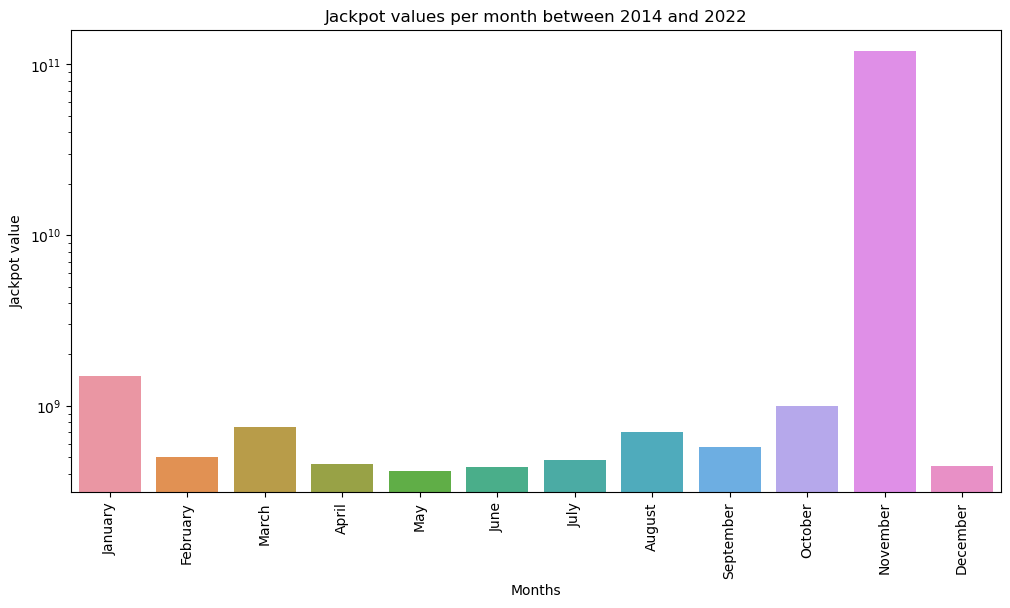

In [21]:
# Top month jackpts for years 2014 to 2022

# Set the figure size
plt.figure(figsize=(12, 6))

x_axis = jackpot_common_months['Months']
y_axis = jackpot_common_months['Max Month Jackpot']
# Create a bar plot of the jackpot values per month
ax = sns.barplot(x=x_axis, y=y_axis, data=jackpot_common_months, errorbar=None).set(xlabel = 'Months', ylabel = 'Jackpot value', title = 'Jackpot values per month between 2014 and 2022')

# set the y-axis scale to logarithmic
plt.yscale('log')

plt.xticks(rotation=90)


plt.show()

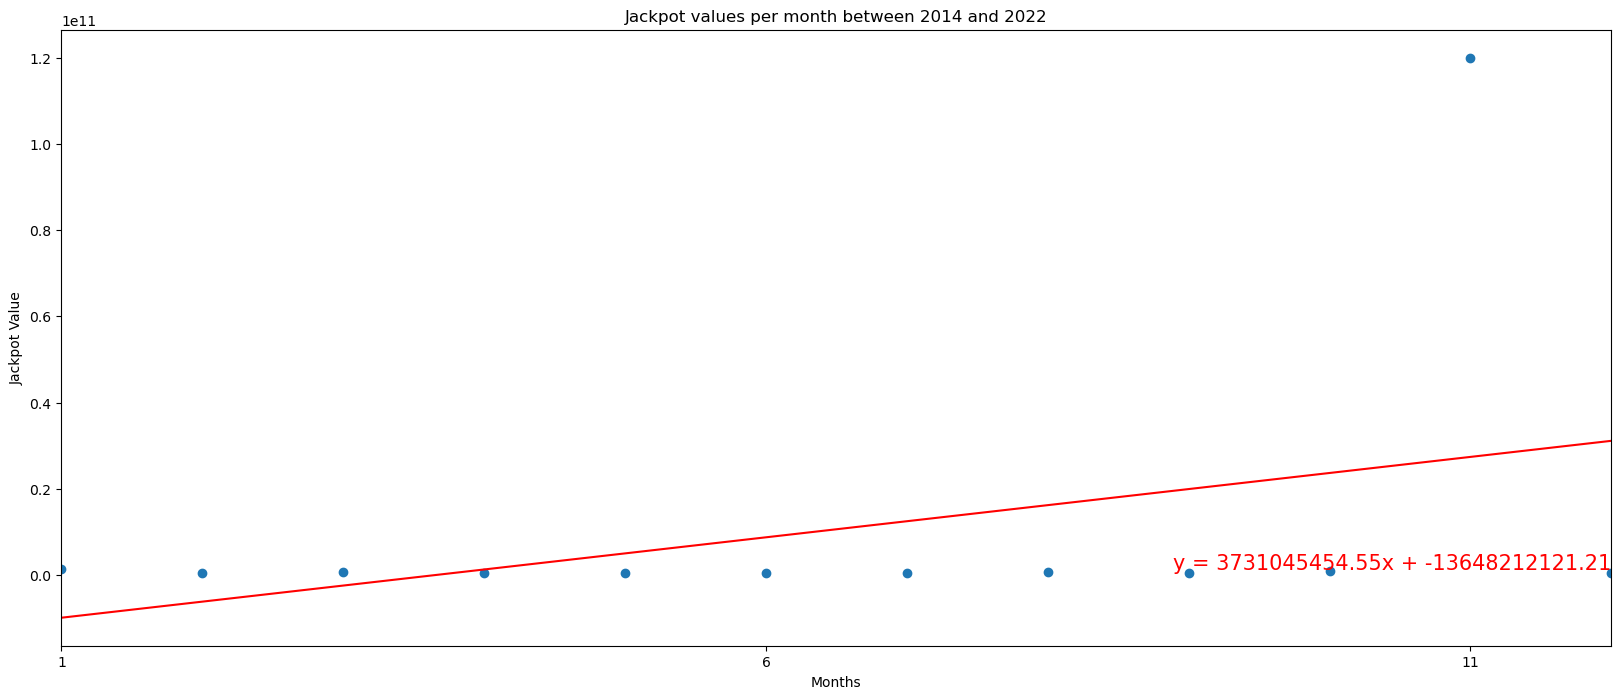

The r-value is: 0.39046571581394157


In [22]:
# linear regression for correlation coefficient to see if the months have any relationships
x_axis = jackpot_common_months.index
y_axis = jackpot_common_months['Max Month Jackpot']
graph_linreg_1 = linreg(x_axis, y_axis, 'Months','Jackpot Value', 'Jackpot values per month between 2014 and 2022')

In [23]:
summary_statistics = jackpot_common_months.describe()

# for common jackpots for each month between the dates June 2014 to November 2022.
summary_statistics

,Max Month Jackpot
count,1.200000e+01
mean,1.060358e+10
std,3.445239e+10
min,4.150000e+08
25%,4.507500e+08
50%,5.350000e+08
75%,8.125000e+08
max,1.200000e+11


In [24]:
# make a copy of the original DataFrame to manipulate
month_lottery_df = wa_lottery_df.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df['date'] = pd.to_datetime(month_lottery_df['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df['month'] = month_lottery_df['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball
month = month_lottery_df.groupby('month')

# create an empty dictionary
jackpots = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest
    jackpots[i] = month_data['jackpot']

In [25]:
# create an empty list to hold the rows
rows = []

# iterate over the items in the jackpot_common dictionary
for month, jackpots in jackpots.items():
    # create a new row for each jackpot value
    for jackpot in jackpots:
        row = {'Month': month, 'Jackpots': jackpot}
        rows.append(row)

# create a new DataFrame from the list of rows
jackpots = pd.DataFrame(rows)
jackpots

,Month,Jackpots
0,1,131000000.0
1,1,162000000.0
2,1,162000000.0
3,1,176000000.0
4,1,194000000.0
...,...,...
945,12,363000000.0
946,12,378000000.0
947,12,400000000.0
948,12,416000000.0


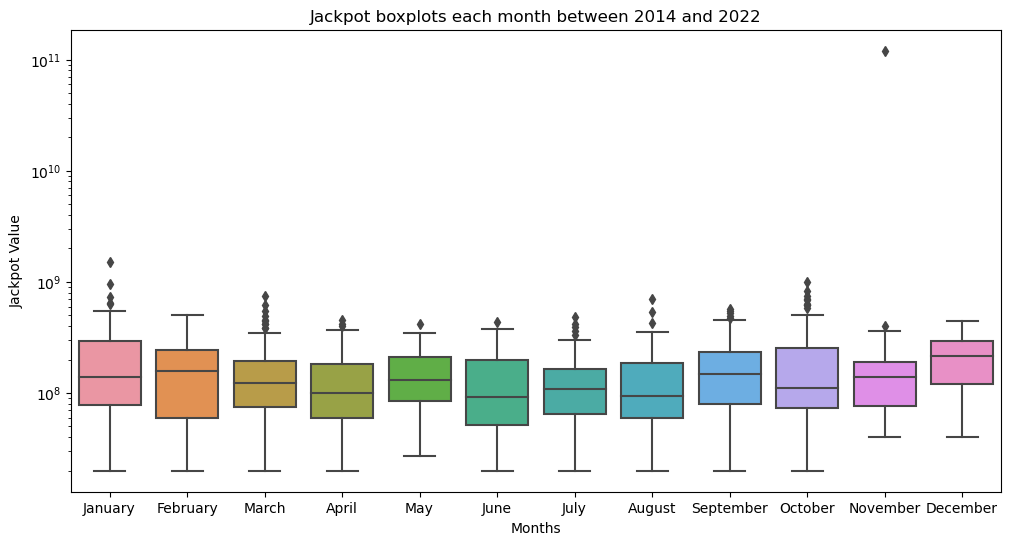

In [26]:
# create the box plot
plt.figure(figsize=(12, 6))

# set the x-axis tick labels to display the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

ax = sns.boxplot(x = 'Month', y = 'Jackpots', data=jackpots).set(title = 'Jackpot boxplots each month between 2014 and 2022', 
                                                            xticklabels = month_names, xlabel= 'Months', ylabel = 'Jackpot Value', yscale = 'log')

plt.show()

In [32]:
# per year jackpots to see if the jackpots are steadily getting more and more per year

# make a copy of the original DataFrame to manipulate
yearly_lottery_df = wa_lottery_df.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
yearly_lottery_df['date'] = pd.to_datetime(yearly_lottery_df['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
yearly_lottery_df['year'] = yearly_lottery_df['date'].dt.year

# # make a variable that holds a groupby function for month in
# # dataframe date_powerball
year = yearly_lottery_df.groupby('year')

# create an empty dictionary
jackpot_common_year = {}

# create a loop that will iterate through 2014 - 2022 (for years).  
for i in range(2014, 2023):
    
    #set a variable to hold the group by each year
    year_data = year.get_group(i) 
    
    # take the variable year_data find the greatest
    jackpot_common_year[i] = year_data['jackpot'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_year = pd.DataFrame.from_dict(jackpot_common_year, orient='index', columns=['Yearly Max Jackpot'])
jackpot_common_year.index.name = 'Year'
jackpot_common_year = jackpot_common_year.reset_index()
jackpot_common_year

,Year,Yearly Max Jackpot
0,2014,2.598000e+08
1,2015,5.000000e+08
2,2016,1.500000e+09
3,2017,7.000000e+08
4,2018,7.500000e+08
5,2019,7.500000e+08
6,2020,3.940000e+08
7,2021,7.300000e+08
8,2022,1.200000e+11


In [28]:
summary_statistics_year = jackpot_common_year['Yearly Max Jackpot'].describe()

# for max yearly jackpots.
summary_statistics_year

count    9.000000e+00
mean     1.395376e+10
std      3.976887e+10
min      2.598000e+08
25%      5.000000e+08
50%      7.300000e+08
75%      7.500000e+08
max      1.200000e+11
Name: Yearly Max Jackpot, dtype: float64

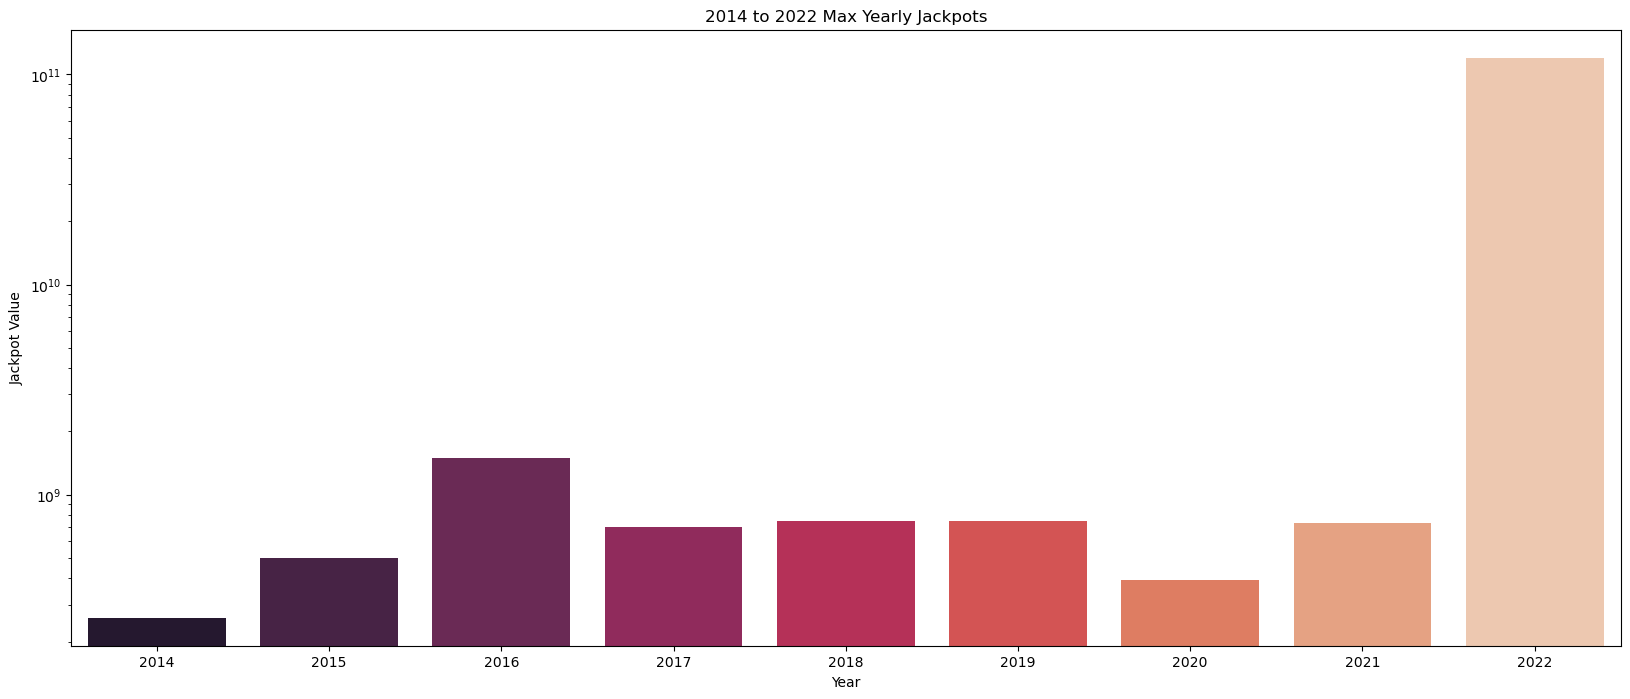

In [29]:
# Barplot to represent the maximum jackpot between 2014 to 2022.

x_axis = jackpot_common_year['Year']
y_axis = jackpot_common_year['Yearly Max Jackpot']

ax = sns.barplot(x=x_axis, y=y_axis, data = jackpot_common_year, palette = 'rocket').set(ylabel = 'Jackpot Value', title="2014 to 2022 Max Yearly Jackpots", yscale = 'log')

plt.show()

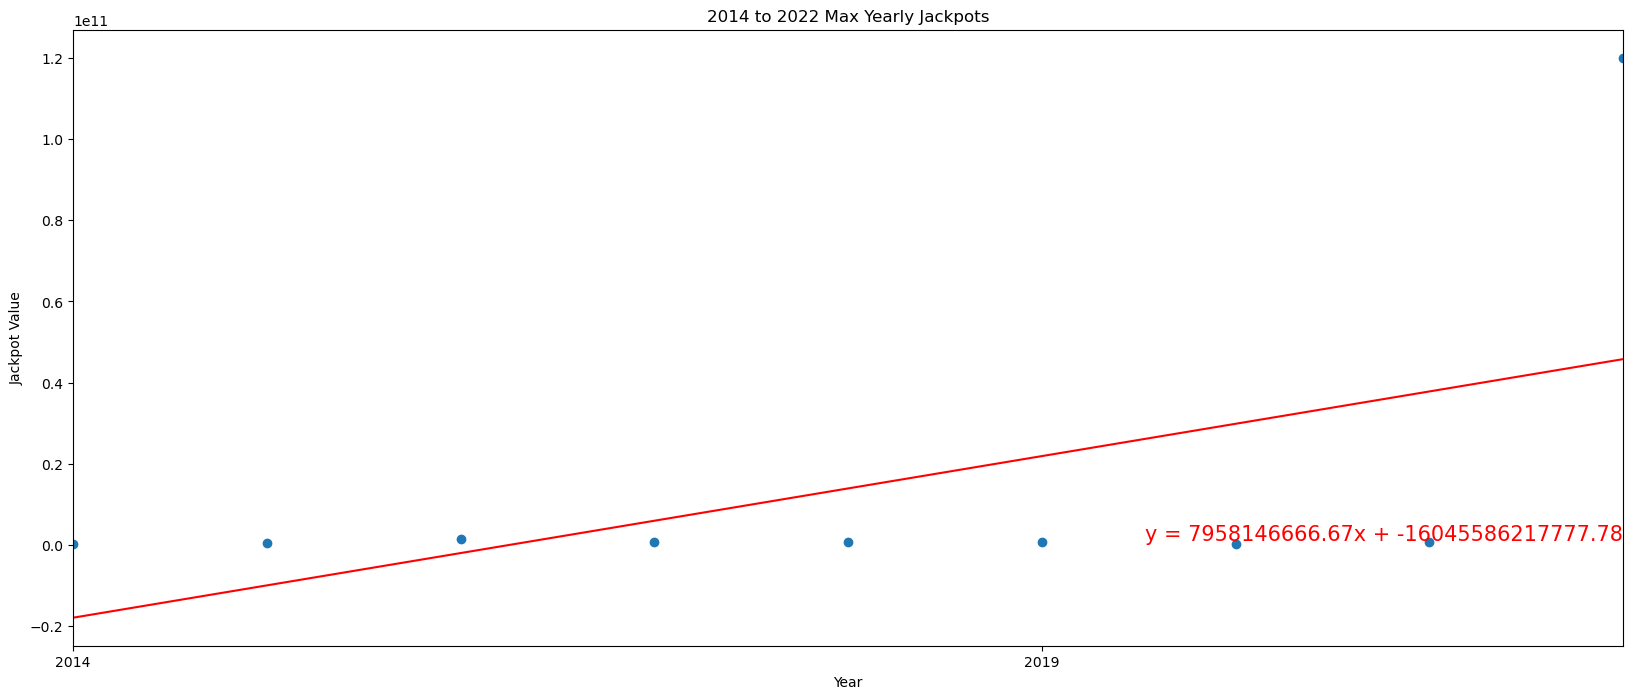

The r-value is: 0.5480236557671588


In [30]:
# Linear regression to see if there is a coorelation between the jackpots and as time goes on

graph_linreg_2 = linreg(x_axis, y_axis, 'Year','Jackpot Value', '2014 to 2022 Max Yearly Jackpots')
